# Introduction

## **WeConnect**
-----------------------
### Company Introduction
--------------------------
Your client for this project is a Telecom Service Provider.
- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- The objective is to use the model to take further actions for preventing customers to churn.
- They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.

### Current Scenario
- Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

----------------------------

# Problem Statement

The company suffers from the following problems:

- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

In return, they have decided to find a more optimal way and hired a team of data scientists to solve this problem.

Your Role
--------
- You are given datasets of past customers and their status (Churn: Yes or No).
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.
---------------------------

# Importing All Libraries

In [4]:
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")  

# Dataset Feature Description
The Dataset contains the following columns:

|Column Name|Description|
| ------------- |:-------------                                               :| 
|CustomerID|Passenger Identity|
|Gender|Whether the customer is a male or a female|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|Tenure|Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

# **Load all the input files.**

In [5]:
train_df = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/TeleChurnPred/Churn_train.csv' )
test_df = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/TeleChurnPred/Churn_test.csv')


In [6]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [7]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


# **Data Description**

- In this section we will get **description** and **statistics** about the data.

In [8]:
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


In [9]:
test_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.163236,32.743790,64.691980
std,0.369712,24.581736,30.040784
min,0.000000,0.000000,18.700000
25%,0.000000,9.000000,36.850000
50%,0.000000,29.000000,70.150000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


**Observations**:
----------------
> **Train Dataset**
   - The **tenure**'column data is right skewed data. Most of the customers have stayed with the company for an average 32.27 months and max 72 months.
   - The **MonthlyCharges** column data is left skewed data. The average monthly charge is around $64.7. 
     
> **Test Dataset**
   - The **tenure**'column data is right skewed data. Most of the customers have stayed with the company for an average 32.74 months and max 72 months.
   - The **MonthlyCharges** column data is left skewed data. The average monthly charge is around $64.69. 
              


#  **Data Information**

- In this section, we will get information about the data and see some observations.

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


**Observations:**

> **Train Dataset**
     - The train_df dataset has total **21 features** : **1 float64** datatype feature(*MonthlyCharges*), **18 object** datatype features (*customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling, PaymentMethod, TotalCharges and Churn*)  and only **1 int64** datatype feature(*tenure*).

> **Test Dataset**
     - The **test_df** dataset has total **20 features** : **1 float64** datatype feature(*MonthlyCharges*), **17 object** datatype features (*customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling, PaymentMethod and TotalCharges*)  and only **1 int64** datatype feature(*tenure*). 

- There are **No Null** values present in all the columns for both datasets.

- Each feature seems to have correct data type, except for the column - **TotalCharges** in both datasets. It should be converted into '**float64**' type. Needs to be checked for further issues.                        

- We have to perform label encoding for the categorical variables for performing the **Logistic Regresssion**. 

# **Data Pre-Profiling**

## Pre Profiling Report

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
profile = ProfileReport(df = train_df)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- There are **21 features** with **99003 unique observations** in the dataset.Total memory used is **924.5+ KB**.

- Dataset has **No duplicate rows**.

- Dataset has **No missing** values.

- The number of **male** and **female** users are almost same. 

- Most preferred payment method is via **Electronic check**.

- Column **MonthlyCharges** has high correlation with column: **TotalCharges**.

# **Data Preparation**

 ## Inconsistent Values
 > For column  **TotalCharges**

> **Training Dataset:** Converting the datatype from **'object' to'float64'** for the column-**TotalCharges** in **train_df**.

In [13]:
# For column - **TotalCharges** - ValueError: could not convert string to float: ''. Need to inspect for empty data and data with spaces - single ('') and double ('  ').
train_df['TotalCharges'] = train_df['TotalCharges'].astype(np.float64)

ValueError: could not convert string to float: ''

In [ ]:
# Checking for empty columns in Train dataset - No empty columns were found.
train_df.empty

In [14]:
# train_df = train_df.replace('', np.nan)  - No single spaces were present
train_df = train_df.replace(' ', np.nan)   # checked for double spaces ' '
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

**Observation:** 
    The dtype correction from 'object' to 'float64' for column 'TotalCharges' was giving ValueError despite the fact that there were no NaN values in it. 
    Hence checked for spaces- single ('') and double ('  ') by replacing with NaN values and found that there were 8 double spaces found in train dataset.

> **Testing Dataset:** -Converting the datatype from **'object' to'float64'** for the column-**TotalCharges** in **test_df**.

In [ ]:
# For column - **TotalCharges** - ValueError: could not convert string to float: ''. Need to inspect for empty data and data with spaces - single ('') and double ('  ').
test_df['TotalCharges'] = test_df['TotalCharges'].astype(np.float64)

In [ ]:
# Checking for empty columns in Test dataset - No empty columns were found.
test_df.empty

In [15]:
# test_df = test_df.replace('', np.nan)   - No single spaces were present
test_df = test_df.replace(' ', np.nan)    # checked for double spaces ' '
test_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

**Observation:** 
    The dtype correction from 'object' to 'float64' for column 'TotalCharges' was giving ValueError despite the fact that there were no NaN values in it. Hence checked for spaces- single ('') and double ('  ') by replacing with NaN values and found that there were 3 double spaces found in test dataset.

> **Training Dataset:** Now converting the datatype from **'object' to'float64'** for the column-**TotalCharges** in **train_df** after correction for **ValueError**.

In [16]:
train_df.describe()
# train_df.info()
train_df['TotalCharges'] = train_df['TotalCharges'].astype(np.float64)
train_df.info()
# train_df['TotalCharges'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
train_df.describe()

> **Testing Dataset:** Now converting the datatype from **'object' to'float64'** for the column-**TotalCharges** in **test_df** after correction for **ValueError**.

In [17]:
test_df.describe()
# train_df.info()
test_df['TotalCharges'] = test_df['TotalCharges'].astype(np.float64)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [18]:
test_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1406.000000
mean,0.163236,32.743790,64.691980,2293.856437
std,0.369712,24.581736,30.040784,2269.054321
min,0.000000,0.000000,18.700000,19.200000
25%,0.000000,9.000000,36.850000,423.687500
50%,0.000000,29.000000,70.150000,1413.550000
75%,0.000000,56.000000,89.850000,3791.875000
max,1.000000,72.000000,118.750000,8672.450000


 ## Redundant Values

In [ ]:
train_df.duplicated().value_counts()

In [ ]:
test_df.duplicated().value_counts()

 ## Missing values

> **Training Dataset**

In [20]:
train_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [21]:
train_df['TotalCharges'].fillna(train_df['TotalCharges'].mean(),inplace = True)

In [22]:
train_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> **Testing Dataset**

In [23]:
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [24]:
test_df['TotalCharges'].fillna(test_df['TotalCharges'].mean(),inplace = True)

In [25]:
test_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**Observations:** 
------------------
> Train Dataset: - The **8** missing values in the column - **MonthlyCharges** were replaced with the **mean** value for that specific column.
 
> Test Dataset:  - The **3** missing values in the column - **MonthlyCharges** were replaced with the **mean** value for that specific column.

- The datatype from **'object' to'float64'** for the column-**TotalCharges** has been successfully done for both datasets. ValueError was occuring due to the double spaces existing in the column-**TotalCharges** which have been replaced finally with the respective mean values in datasets.

# **Feature Engineering**

> **Training Dataset:** - For the **train_df** dataset the following features are having redundant options - **('No phone service' and 'No internet service')** hence reducing the total no. of categories for each of these features to  just 2 categories **(Yes, No)**.

In [26]:
train_df['MultipleLines'] = train_df['MultipleLines'].replace('No phone service','No')
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].replace('No internet service','No')
train_df['OnlineBackup'] = train_df['OnlineBackup'].replace('No internet service','No')
train_df['DeviceProtection'] = train_df['DeviceProtection'].replace('No internet service','No')
train_df['TechSupport'] = train_df['TechSupport'].replace('No internet service','No')
train_df['StreamingTV'] = train_df['StreamingTV'].replace('No internet service','No')
train_df['StreamingMovies'] = train_df['StreamingMovies'].replace('No internet service','No')

In [27]:
train_df.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,2400-XIWIO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,2838,2932,3968,5087,3247,2479,4022,3719,3694,4002,3467,3434,3104,3321,1893,4113


> **Testing Dataset** - For the **test_df** dataset the following features are having redundant options - **('No phone service' and 'No internet service')** hence reducing the total no. of categories for each of these features to  just 2 categories **(Yes, No)**.

In [28]:
test_df['MultipleLines'] = test_df['MultipleLines'].replace('No phone service','No')
test_df['OnlineSecurity'] = test_df['OnlineSecurity'].replace('No internet service','No')
test_df['OnlineBackup'] = test_df['OnlineBackup'].replace('No internet service','No')
test_df['DeviceProtection'] = test_df['DeviceProtection'].replace('No internet service','No')
test_df['TechSupport'] = test_df['TechSupport'].replace('No internet service','No')
test_df['StreamingTV'] = test_df['StreamingTV'].replace('No internet service','No')
test_df['StreamingMovies'] = test_df['StreamingMovies'].replace('No internet service','No')

In [29]:
test_df.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409
unique,1409,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,2499-AJYUA,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,717,709,965,1274,825,617,1002,895,927,997,869,877,771,850,472


> **Train Dataset**   
   - The values in **tenure** column have floating values in months hence we will use **Feature Engineering** to convert these values in the year ranges.
   - Range of column- **tenure** ==> Min = 0 , Max = 72. 
   - Also need tp convert its datatype from **'int64' to 'str'**.

In [30]:
bins = np.arange(0, 76, 12)
labels = ['0-1 year', '1-2 year', '2-3 year', '3-4 year','4-5 year','5-6 year']
train_df['tenure'] = pd.cut(train_df['tenure'], bins = bins, labels = labels )

In [31]:
train_df['tenure']

0       0-1 year
1       3-4 year
2       5-6 year
3       5-6 year
4       2-3 year
          ...   
5629    0-1 year
5630    4-5 year
5631    2-3 year
5632    0-1 year
5633    1-2 year
Name: tenure, Length: 5634, dtype: category
Categories (6, object): ['0-1 year' < '1-2 year' < '2-3 year' < '3-4 year' < '4-5 year' < '5-6 year']

In [32]:
# Need to convert the dtype from 'int64' to 'str'. 
train_df['tenure'] = train_df['tenure'].astype(np.object)

> **Test Dataset**   
   - The values in **tenure** column have floating values in months hence we will use **Feature Engineering** to convert these values in the year ranges.
   - Range of column- **tenure** ==> Min = 0 , Max = 72.
   - Also need tp convert its datatype from **'int64' to 'str'**.

In [33]:
bins = np.arange(0, 76, 12)
labels = ['0-1 year', '1-2 year', '2-3 year', '3-4 year','4-5 year','5-6 year']
test_df['tenure'] = pd.cut(test_df['tenure'], bins = bins, labels = labels )

In [34]:
test_df['tenure']

0       3-4 year
1       5-6 year
2       0-1 year
3       0-1 year
4       0-1 year
          ...   
1404    2-3 year
1405    1-2 year
1406    5-6 year
1407    5-6 year
1408    1-2 year
Name: tenure, Length: 1409, dtype: category
Categories (6, object): ['0-1 year' < '1-2 year' < '2-3 year' < '3-4 year' < '4-5 year' < '5-6 year']

In [35]:
# Need to convert the dtype from 'int64' to 'str'. 
test_df['tenure'] = test_df['tenure'].astype(np.object)

In [36]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5626 non-null   object 
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [37]:
train_df.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.225234,0.109910
MonthlyCharges,0.225234,1.000000,0.650337
TotalCharges,0.109910,0.650337,1.000000


In [38]:
train_df.skew()

SeniorCitizen     1.836455
MonthlyCharges   -0.223487
TotalCharges      0.955299
dtype: float64

In [39]:
test_df.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.199972,0.072447
MonthlyCharges,0.199972,1.000000,0.651015
TotalCharges,0.072447,0.651015,1.000000


In [40]:
test_df.skew()

SeniorCitizen     1.824350
MonthlyCharges   -0.208853
TotalCharges      0.991778
dtype: float64

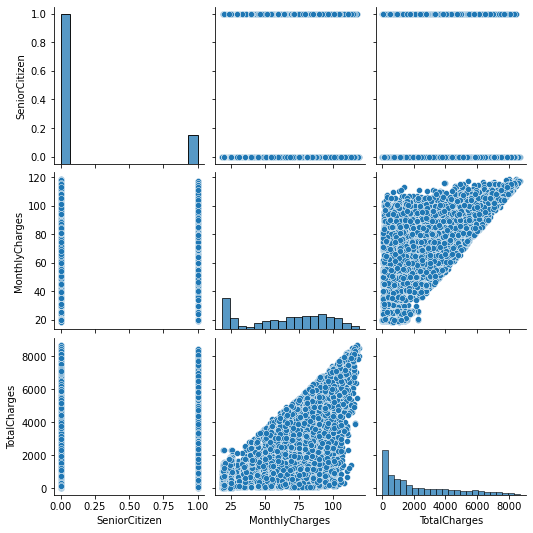

In [41]:
sns.pairplot(train_df)

In [ ]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")

**Observations:**
> For both Train and Test Datasets:

 - There is positive correlation between the **TotalCharges** with **MonthlyCharges** columns.
 - There is low positive correlation between the **MonthlyCharges**  and **SeniorCitizen** column. Higher the monthly subscription charges are less preferred by Senior Citizens..
 - It is highly skewed data for column - **SeniorCitizen** hence needs to be scaled using Standard Scaler menthod.

# Exploratory Data Analysis

**Question 1: What is the frequency of Customer Churn?**

In [ ]:
train_df['Churn'].value_counts()

In [ ]:
train_df['Churn'].value_counts()/train_df['Churn'].shape[0] *100

In [ ]:
fig = plt.figure(figsize = [9, 7])
train_df['Churn'].value_counts().plot.bar(color='#1B9E77')
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel = 'Churn', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

**Observation:**

- We can observe that there are lesser number of people (**26.9 %**) that **Churned** from the company.


**Question 2: What is the ratio of the gender category of Customers?**

In [ ]:
train_df['gender'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['orange', 'pink'])

**Observation:**

- We can observe that there is a clear balance between males customers (**50.37 %**) and female customers (**49.63 %**) using the company service.

**Question 3: What is the relation between Customer Churn and gender?**

In [ ]:
sns.countplot(data=train_df,x='gender',hue='Churn')

**Observation:**
 - We can observe that there is not much difference in churn rate based on gender.

**Question 4: What is the relation between Customer Churn and Senior Citizen?**

In [ ]:
sns.countplot(data=train_df,x='SeniorCitizen',hue='Churn', palette = ['skyblue','green'])

**Observation:**
 - We can observe that there are not many Senior Citizens using the company service. Their Churn rate is also insignificant

**Question 5: What is the relation between Customer Churn and tenure?**

In [ ]:
sns.countplot(data=train_df,x='tenure',hue='Churn', palette = ['skyblue','orange'])

**Observations:**
  - Customers who had just started using the company services or have been using it for at least **1 year** (**0-1 year**) are the ones who have churned the most out of all **tenure** categories.
  - On the other hand, there are customers who have not churned and have been associated with the company for a period of **5-6 years**.

**"Question 6: How does Customer's Partner affect the Churn rate?"**

In [ ]:
sns.countplot(data=train_df,x='Partner',hue='Churn', palette = ['lightgreen','yellow'])

**Observations:**
  - Proportion of Churn rate is low in case of customer having **Partner**. Hence the column - **Partner** affects Churn rate. 

**"Question 7: How does Customer's Dependents affect the Churn rate?"**

In [ ]:
sns.countplot(data=train_df,x='Dependents',hue='Churn', palette = ['red','grey'])

In [ ]:
# **Observations:**
  - Proportion of Churn rate is low in case of customer having **Dependents**. Hence the column - **Dependents** affects Churn rate. 

**"Question 8: How does customer having Phone Service or not affect the Churn rate?"**

In [ ]:
sns.countplot(data=train_df,x='PhoneService',hue='Churn')

**Observations:**
  - We find that there are very few customers who don't have Phone service.
  - This factor does not have much impact on customer Churn.

**"Question 9: How does customer having Internet Service or not affect the Churn rate?"**

In [ ]:
# Let's find the indidividual count of the types of Internet Service used by customer.
sns.countplot(data=train_df,x='InternetService')

In [ ]:
sns.countplot(data=train_df,x='InternetService',hue='Churn', palette = ['orange','green'])

**Observations:**
  - Most of the customers have been using **Fiber Optic** internet service as compared to other options. But we also find that the Churn is maximum for **Fiber Optic** users.
  - Customers using the **DSL** internet service have been using company services the most by not churning.
  - Thus Internet Service has impact on Churn.

**"Question 10: How do the company services options provided to customer affect the Churn rate?"**

 - Here we are going to test the impact of the following services-**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies**.

In [ ]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

###################################################
# First Plot for OnlineSecurity vs Churn
###################################################
plt.subplot(2,3, 1)

sns.countplot(data=train_df,x='OnlineSecurity',hue='Churn')

###################################################
# Second Plot for OnlineBackup vs Churn
###################################################
plt.subplot(2,3, 2)

sns.countplot(data=train_df,x='OnlineBackup',hue='Churn')

###################################################
# Third Plot for DeviceProtection vs Churn
###################################################
plt.subplot(2,3, 3)

sns.countplot(data=train_df,x='DeviceProtection',hue='Churn')

###################################################
# Fourth Plot for TechSupport vs Churn
###################################################
plt.subplot(2,3, 4)

sns.countplot(data=train_df,x='TechSupport',hue='Churn', palette = ['skyblue','red'])

###################################################
# Fifth Plot for StreamingTV vs Churn
###################################################
plt.subplot(2,3, 5)

sns.countplot(data=train_df,x='StreamingTV',hue='Churn', palette = ['skyblue','red'])

###################################################
# Sixth Plot for StreamingMovies vs Churn
###################################################
plt.subplot(2,3, 6)

sns.countplot(data=train_df,x='StreamingMovies',hue='Churn', palette = ['skyblue','red'])

###################################################
# Display the output by rendering visual on the screen

plt.show()
##################################################


**Observations:**

> **Row 1:**
  - **Column 1 : OnlineSecurity**   - Proportion of Churn is **high** for customers with **No Online Security**.
  - **Column 2 : OnlineBackup**     - Proportion of Churn is **high** for customers with **No Online Backup**.
  - **Column 3 : DeviceProtection** - Proportion of Churn is **high** for customers with **No Device Protection**.
 
> **Row 2:**
  - **Column 1 : TechSupport**      - Proportion of Churn is **high** for customers with **No Technical Support**.
  - **Column 2 : StreamingTV**      - Proportion of Churn is almost same for customers with or without **StreamingTV** service.
  - **Column 3 : StreamingMovies**  - Proportion of Churn is almost same for customers with or without **StreamingMovies** service.

**"Question 11: How does the company contract with customer affect the Churn rate?"**

In [ ]:
# Let's observe the types of the contract issued by the company to the customers.
sns.countplot(data=train_df,x='Contract')

In [ ]:
sns.countplot(data=train_df,x='Contract',hue='Churn')

**Observations:**
  - Maximum customers have opted for **Month-to-month** contract with the company. But it is also found that the churn rate is **high** for these customers.
  - Customers opting for **Two year** contract with company have shown the least Churn rate.
  - Thus **Contract** has impact on Churn.

**"Question 12: How are the PaymentMethod and PaperlessBilling related ?"**

In [ ]:
sns.countplot(data=train_df,x='PaymentMethod')
plt.xticks(rotation=45, size=12)

In [ ]:
sns.countplot(data=train_df,x='PaperlessBilling')

In [ ]:
sns.countplot(data=train_df,x='PaymentMethod',hue='PaperlessBilling')
plt.xticks(rotation=45, size=12)

**Observations:**
  - Maximum customers have opted for **Electronic Check** as payment method with the company. Most of them have opted for **Paperless Billing** facility too.
  - Customers opting for **Mailed check** do not prefer **Paperless Billing** as it may not be required.


**"Question 13: How does the Monthly Charges affect the Churn rate?"** 

In [ ]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[10, 9])

sns.displot(train_df, x = "MonthlyCharges", hue = "Churn", binwidth=18, multiple="dodge")

**Observations:**
  - We can observe that as the **Monthly Charges** increased from 20 there has been a rise in the Churn rate.
  - Thus **MonthlyCharges** has a huge impact on Churn.

**"Question 14: How does the TotalCharges affect the Churn rate?"** 

In [ ]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[10, 12])

sns.displot(train_df, x = "TotalCharges", hue = "Churn", bins=10, multiple="dodge")

**Observations:**
  - Customers having churn rate have usually lower annual charges. 
  - This shows that our data is imbalanced.

## **Data Transformation**

- The **numerical** features of the dataset are being normalised using Standard Scaler.
- The **categorical** features of the dataset are being label encoded for preparing for Regression.

> Train Dataset

In [42]:
from sklearn.preprocessing import StandardScaler


num_cols = train_df.select_dtypes(exclude = np.object)
# define standard scaler
scaler = StandardScaler()
# transform data
train_df[num_cols.columns] = scaler.fit_transform(num_cols)
# print(scaled)
train_df.skew()

SeniorCitizen     1.836455
MonthlyCharges   -0.223487
TotalCharges      0.955299
dtype: float64

In [43]:
le = LabelEncoder()

Cat_cols = train_df.select_dtypes(include = np.object)
Cat_cols

for i in Cat_cols.columns:
  train_df[i] = le.fit_transform(train_df[i])

In [44]:
train_df['Churn'].value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

> Test Dataset

In [45]:
from sklearn.preprocessing import StandardScaler


num_cols = test_df.select_dtypes(exclude = np.object)
# define standard scaler
scaler = StandardScaler()
# transform data
test_df[num_cols.columns] = scaler.fit_transform(num_cols)
# print(scaled)
test_df.skew()

SeniorCitizen     1.824350
MonthlyCharges   -0.208853
TotalCharges      0.991778
dtype: float64

In [46]:
le = LabelEncoder()

Cat_cols = test_df.select_dtypes(include = np.object)
Cat_cols

for i in Cat_cols.columns:
  test_df[i] = le.fit_transform(test_df[i])

In [47]:
test_df['Dependents'].value_counts()

0    965
1    444
Name: Dependents, dtype: int64

# **Evaluating the Model**

> Evaluating the model for the **train_df** dataset

In [48]:
X = train_df.drop(['customerID','Churn'],axis =1)
Y = train_df['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4507, 19) (4507,)
Testing Data Shape: (1127, 19) (1127,)


## Logistic Regression - Baseline Model

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## Using Trained Model for Prediction

In [51]:
ytrain_pred = logreg.predict(X_train)

## Checking Confusion Matrix

In [52]:
cnf_M = pd.DataFrame(confusion_matrix(y_train, ytrain_pred))
cnf_M.index = ['Actual Not Churned','Actual Churned']
cnf_M.columns = ['Predicted Not Churned','Predicted Churned']
print(cnf_M)

                    Predicted Not Churned  Predicted Churned
Actual Not Churned                   2953                332
Actual Churned                        551                671


In [53]:
print('Accuracy score for train data is:', accuracy_score(y_train, ytrain_pred))

Accuracy score for train data is: 0.8040825382737963


## Applying the Train Model to the Test Dataset

In [55]:
test1 = test_df.drop(['customerID'], axis = 1)

In [56]:
ypred = logreg.predict(test1)
ypred

array([0, 0, 0, ..., 0, 0, 1])

In [57]:
ypred.shape[0]

1409

In [58]:
smpl_Col = ["ID", "Churn"]
sample = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/TeleChurnPred/sample_submission.csv', names = smpl_Col, header = None)
prd = pd.DataFrame(data = ypred)
prd.columns = ["ChurnPred"]
prd = prd.replace(0, 'No').replace(1,'Yes')
sample
finaldf = pd.concat([sample['ID'],prd],axis = 1)
finaldf.head()
# # prd
finaldf.to_csv('submission.csv',header = None, index = False)
finaldf.head()

,ID,ChurnPred
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,Yes
4,7919-ZODZZ,No


# Conclusion:
- We **studied in breifly about the data**, its **characteristics** and its **distribution**.
​
- We **explored** some **questions related** to Customer Churn and not Churn.
​
- We **investigated in depth about the features** which to **retain** and which to **discard**.
​
- We **performed model training**.
​
- We **observed metrics for our prediction**. The Accuracy score came out to be **0.80**.
​
- This **model** now can **help us** in **identifying** which customers Churned and not Churned.